# 🏠 Data visualization - House data

## Load packages and data

In [14]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/clean/house-data.csv")

# Set sns theme
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_context("paper")

## Summary of the data

In [15]:
print(df.describe())
print(df['District'].unique())

              Price       Parking  ConstructionYear  NumberOfBathrooms  \
count  3.106400e+04  31064.000000      31064.000000       31064.000000   
mean   3.526678e+05      0.851049       1982.494109           2.278103   
std    4.324493e+05      1.026698         29.034748           1.828448   
min    2.300000e+03      0.000000       1900.000000          -1.000000   
25%    9.800000e+04      0.000000       1951.000000           1.000000   
50%    2.400000e+05      1.000000       1987.000000           2.000000   
75%    4.370000e+05      1.000000       2006.000000           3.000000   
max    1.099500e+07      3.000000       2025.000000         131.000000   

        AreaAssigned  RoomsAssigned   PricePerSqm  
count   31064.000000   31064.000000  31064.000000  
mean      331.609870       3.871008   1957.090823  
std      5527.679399      15.735981   1598.492567  
min        12.000000       0.000000      0.110700  
25%        96.000000       3.000000    838.235294  
50%       154.000000 

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31064 entries, 0 to 31063
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              31064 non-null  float64
 1   District           31064 non-null  object 
 2   City               31064 non-null  object 
 3   Town               31064 non-null  object 
 4   Type               31064 non-null  object 
 5   EnergyCertificate  31064 non-null  object 
 6   Parking            31064 non-null  float64
 7   ConstructionYear   31064 non-null  float64
 8   Garage             31064 non-null  bool   
 9   Elevator           31064 non-null  bool   
 10  NumberOfBathrooms  31064 non-null  float64
 11  AreaAssigned       31064 non-null  float64
 12  RoomsAssigned      31064 non-null  float64
 13  PricePerSqm        31064 non-null  float64
 14  Region             31064 non-null  object 
dtypes: bool(2), float64(7), object(6)
memory usage: 3.1+ MB
None


## Number of cases per city

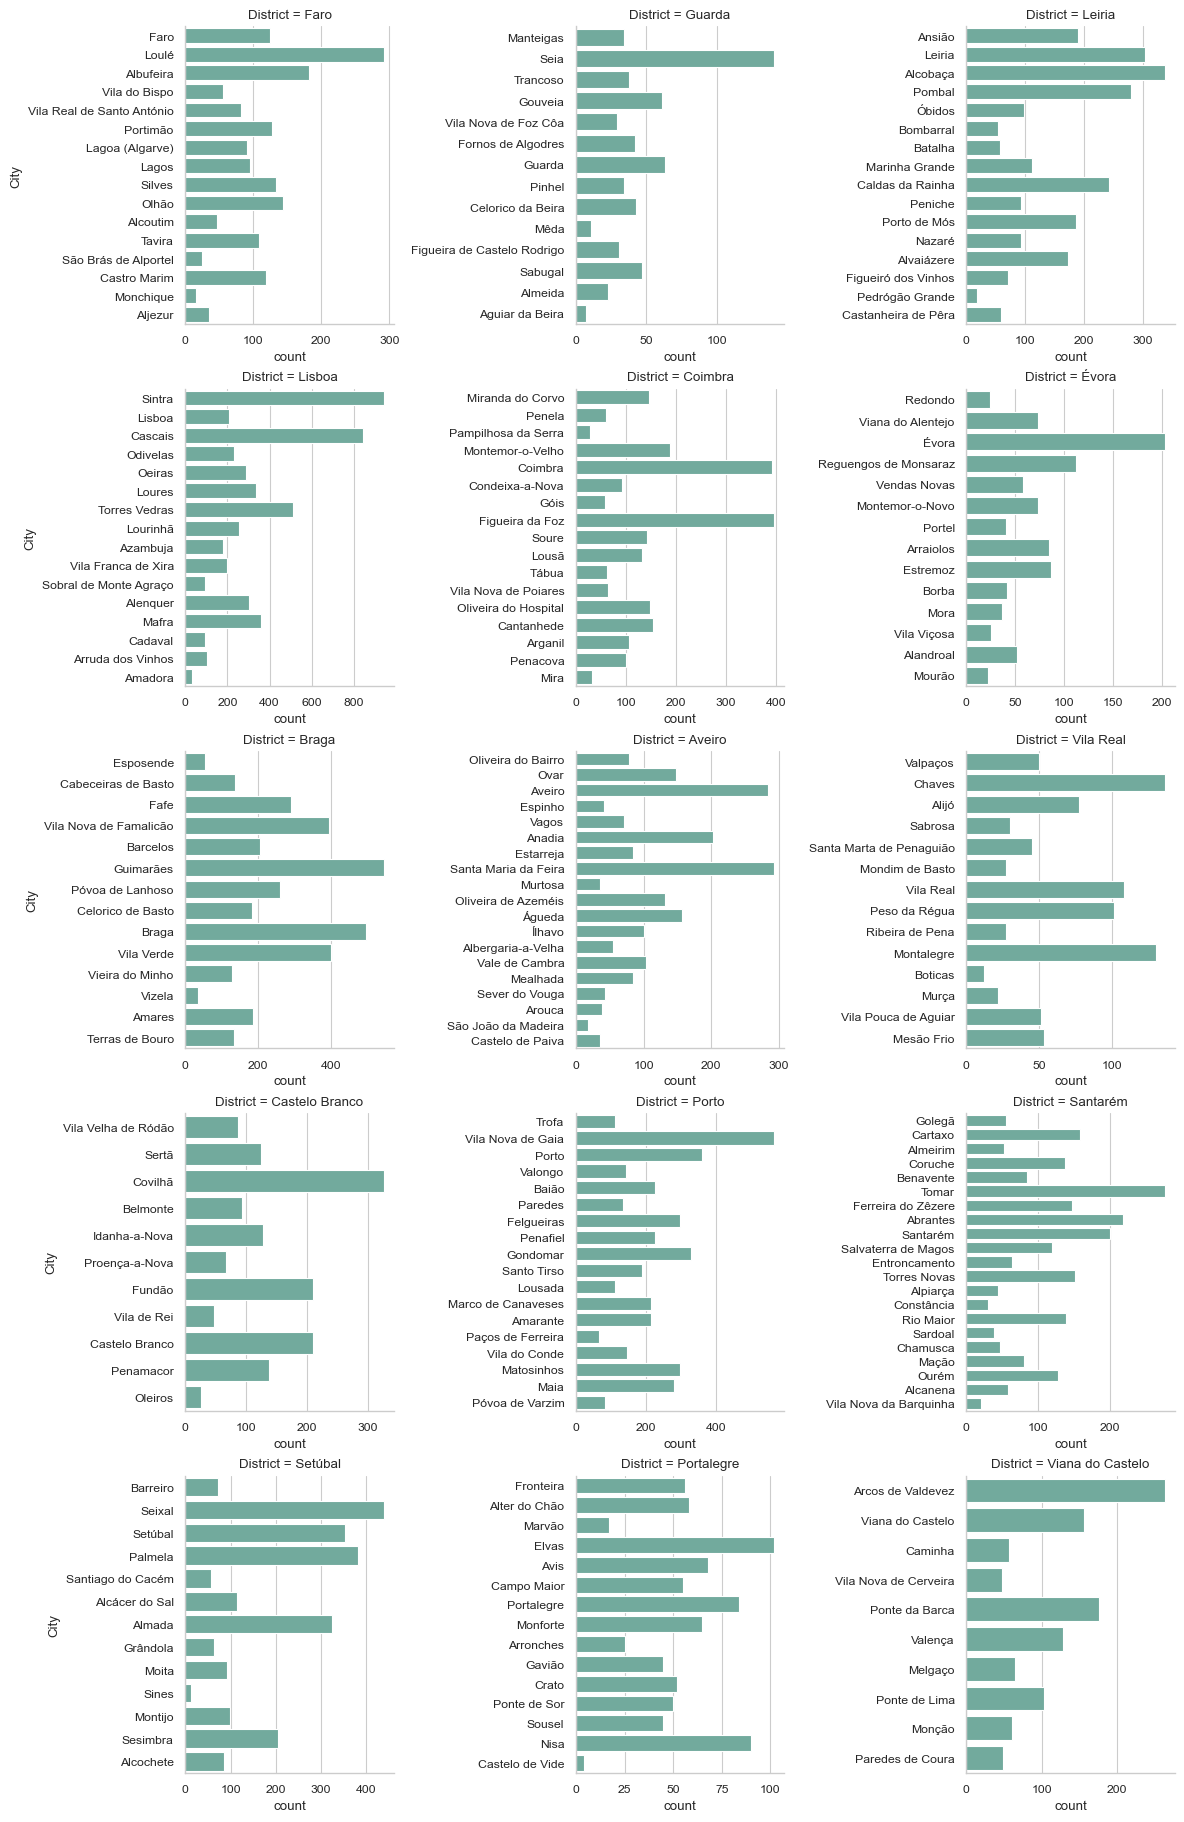

In [17]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4, sharey=False, sharex=False)

g.map_dataframe(
    sns.countplot,
    y="City", 
    color='#69b3a2'
)

plt.subplots_adjust(top=0.9)
plt.show()



## Number of rooms impact on the price

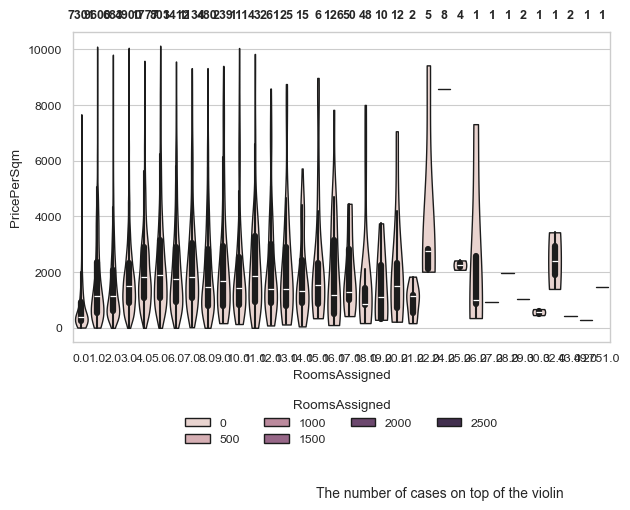

In [18]:
# Grouped violinplot
ax = sns.violinplot(x="RoomsAssigned", y="PricePerSqm", hue="RoomsAssigned", data=df, cut=0)
# Calculate counts
counts = df.groupby(["RoomsAssigned"]).size().reset_index(name='Count')

# Annotate the counts on top
xticks = ax.get_xticks()
rooms = df["RoomsAssigned"].unique()

for j, room in enumerate(rooms):
    count_row = counts[counts["RoomsAssigned"] == room]
    if not count_row.empty:
        label = int(count_row["Count"].iloc[0])
        ax.text(xticks[j], 11000, str(label), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Move legend below
ax.legend(title="RoomsAssigned", loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=4, frameon=False)
# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

## Energy certificates impact on the price

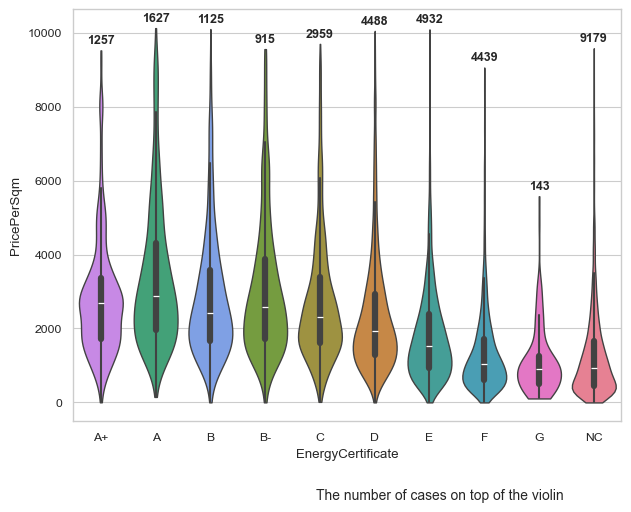

In [19]:
# Set the order of the energy certificates
order = ["A+", "A", "B", "B-", "C", "D", "E", "F", "G", "NC"]

# Grouped violinplot
ax = sns.violinplot(x="EnergyCertificate", y="PricePerSqm", hue="EnergyCertificate", data=df, cut=0, order=order)
# Calculate counts
counts = df.groupby(["EnergyCertificate"]).size().reset_index(name='Count')

# Annotate the counts on top
# Get positions of each Region along x-axis
xticks = ax.get_xticks()
energ_certs = order

for i, certs in enumerate(energ_certs):
    count_row = counts[(counts["EnergyCertificate"] == certs)]
    if not count_row.empty:
        y = df[(df["EnergyCertificate"] == certs)]["PricePerSqm"].max()
        y_offset = 100  # adjust for spacing
        label = int(count_row["Count"].iloc[0])
        # Adjust horizontal position: -0.2 for False, +0.2 for True
        ax.text(i, y + y_offset, str(label), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

## Parking impact on the price

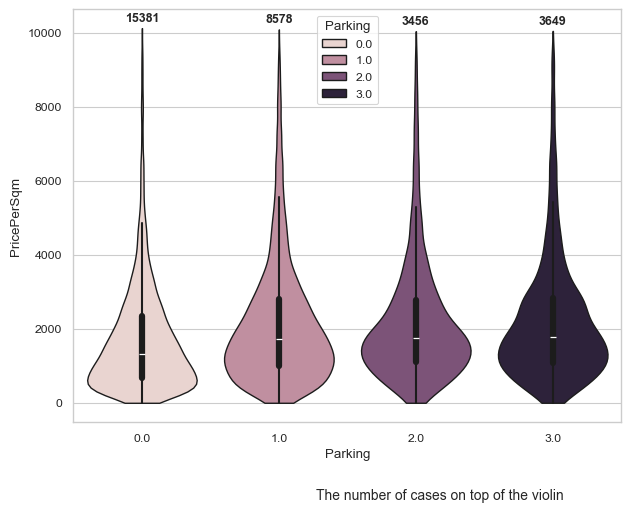

In [20]:
# Grouped violinplot
ax = sns.violinplot(x="Parking", y="PricePerSqm", hue="Parking", data=df, cut=0)
# Calculate counts
counts = df.groupby(["Parking"]).size().reset_index(name='Count')

# Annotate the counts on top
# Get positions of each Region along x-axis
xticks = ax.get_xticks()
regions = df["Region"].unique()
parking = df["Parking"].unique()

for j, park in enumerate(parking):
    count_row = counts[counts["Parking"] == park]
    if not count_row.empty:
        y = df[df["Parking"] == park]["PricePerSqm"].max()
        y_offset = 100  # adjust for spacing
        label = int(count_row["Count"].iloc[0])
        ax.text(park, y + y_offset, str(label), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

## Construction year impact on the price

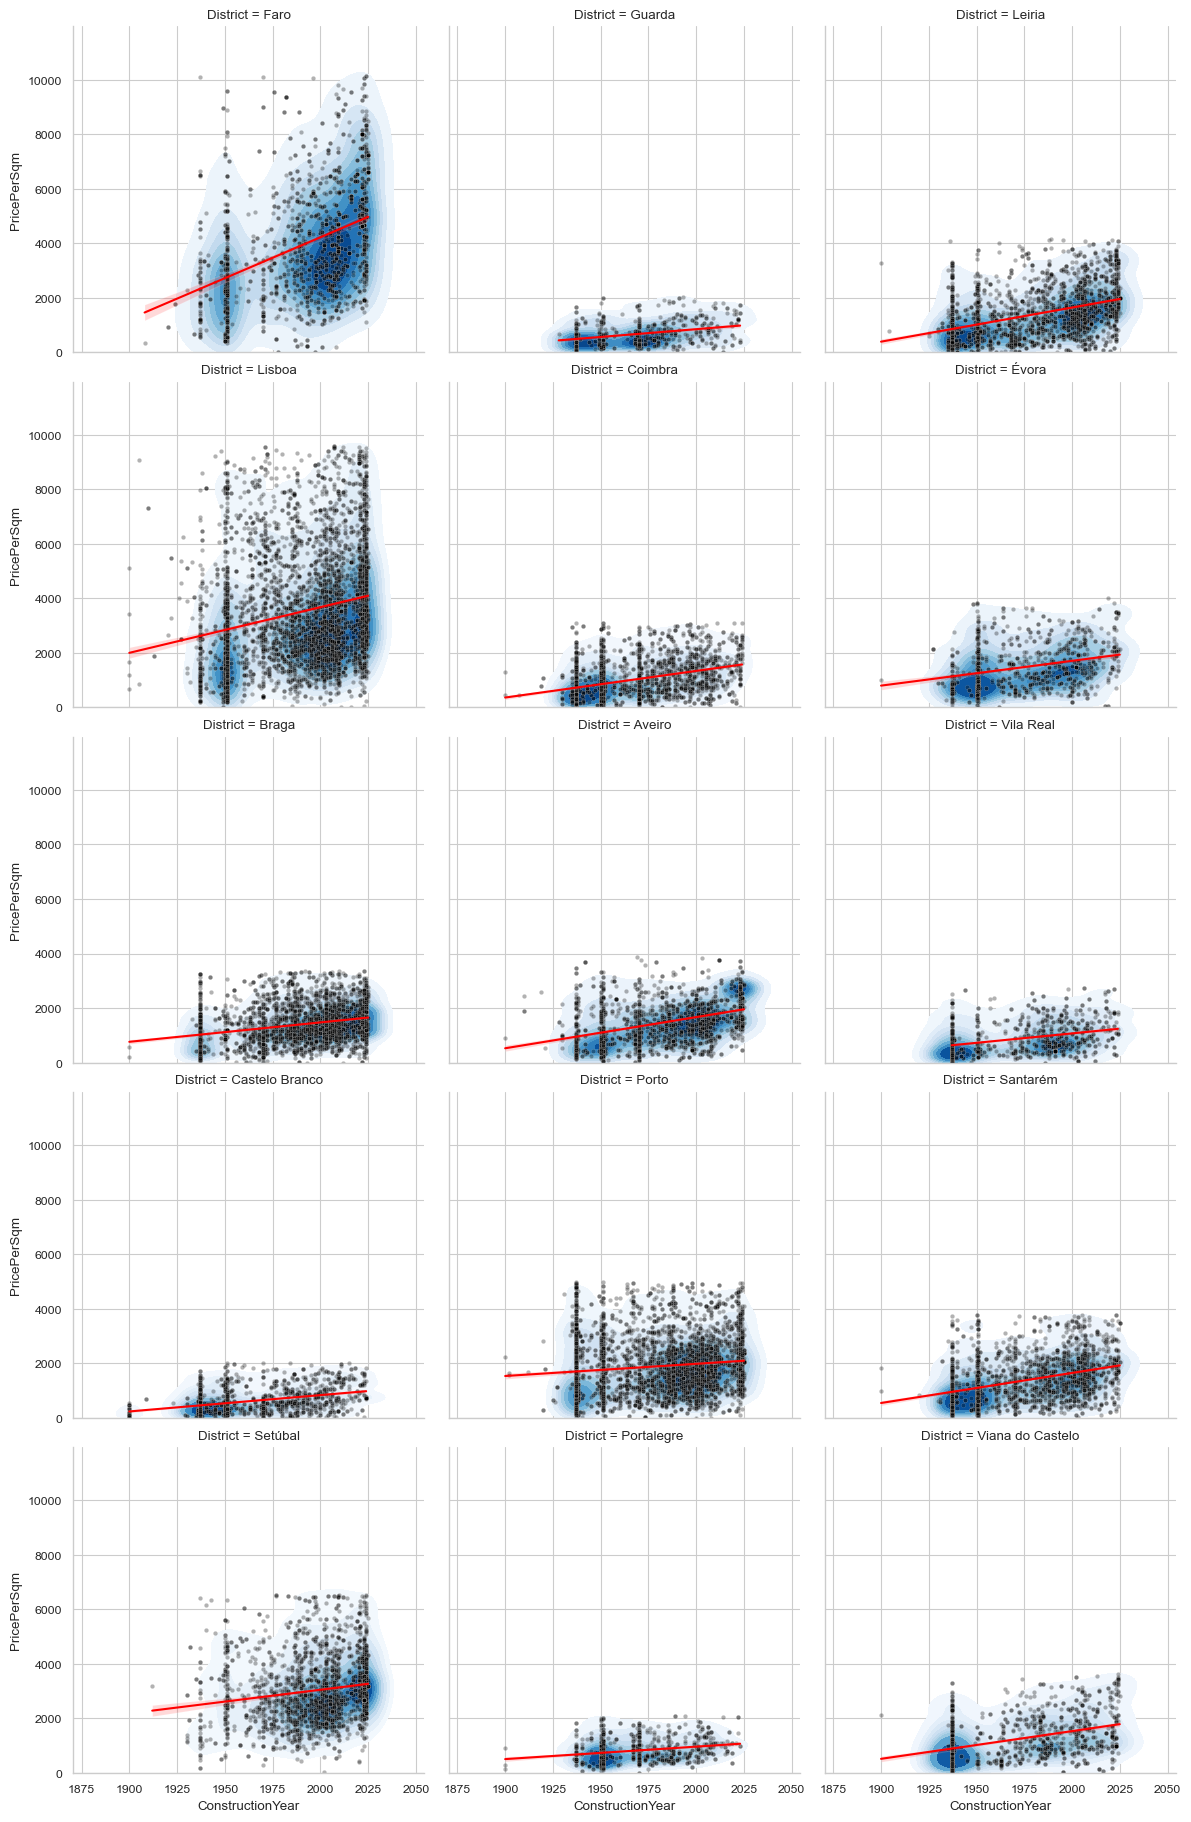

In [21]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4)

# KDE background
g.map_dataframe(
    sns.kdeplot,
    x="ConstructionYear",
    y="PricePerSqm",
    fill=True,
    cmap="Blues"
)

# Overlay datapoints
g.map_dataframe(
    sns.scatterplot,
    x="ConstructionYear",
    y="PricePerSqm",
    color="black",
    alpha=0.3,
    s=10
)

# Add regression line
g.map_dataframe(
    sns.regplot,
    x="ConstructionYear",
    y="PricePerSqm",
    scatter=False,
    color="red",
    line_kws={"linewidth": 1.5}
)

# Fix y-axis
for ax in g.axes.flatten():
    ax.set_ylim(bottom=0)

plt.subplots_adjust(top=0.9)
plt.show()


## Garage impact on the price

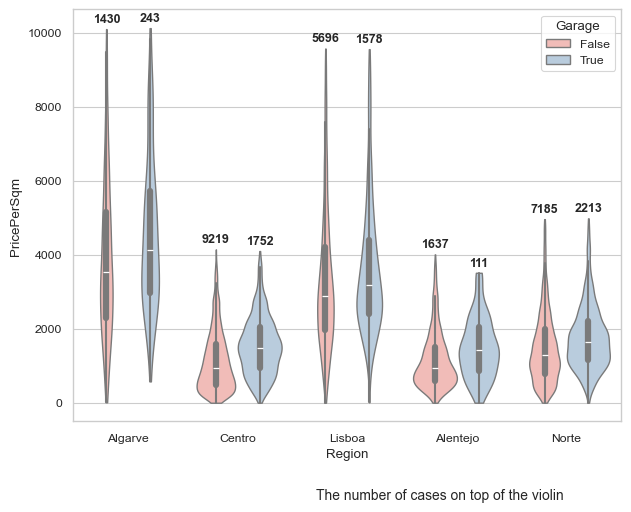

In [22]:
# Grouped violinplot
ax = sns.violinplot(x="Region", y="PricePerSqm", hue="Garage", data=df, cut=0)
# Calculate counts
counts = df.groupby(["Region", "Garage"]).size().reset_index(name='Count')

# Annotate the counts on top
# Get positions of each Region along x-axis
xticks = ax.get_xticks()
regions = df["Region"].unique()

for i, region in enumerate(regions):
    for j, garage in enumerate([False, True]):
        count_row = counts[(counts["Region"] == region) & (counts["Garage"] == garage)]
        if not count_row.empty:
            y = df[(df["Region"] == region) & (df["Garage"] == garage)]["PricePerSqm"].max()
            y_offset = 100  # adjust for spacing
            label = int(count_row["Count"].iloc[0])
            # Adjust horizontal position: -0.2 for False, +0.2 for True
            x_shift = -0.2 if not garage else 0.2
            ax.text(i + x_shift, y + y_offset, str(label), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

## Elevator impact on the price

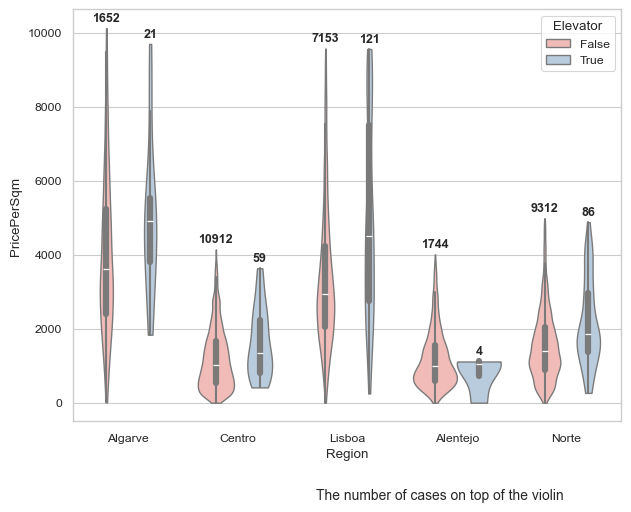

In [23]:
# Grouped violinplot
ax = sns.violinplot(x="Region", y="PricePerSqm", hue="Elevator", data=df, cut=0)
# Calculate counts
counts = df.groupby(["Region", "Elevator"]).size().reset_index(name='Count')

# Annotate the counts on top
# Get positions of each Region along x-axis
xticks = ax.get_xticks()
regions = df["Region"].unique()

for i, region in enumerate(regions):
    for j, elevator in enumerate([False, True]):
        count_row = counts[(counts["Region"] == region) & (counts["Elevator"] == elevator)]
        if not count_row.empty:
            y = df[(df["Region"] == region) & (df["Elevator"] == elevator)]["PricePerSqm"].max()
            y_offset = 100  # adjust for spacing
            label = int(count_row["Count"].iloc[0])
            # Adjust horizontal position: -0.2 for False, +0.2 for True
            x_shift = -0.2 if not elevator else 0.2
            ax.text(i + x_shift, y + y_offset, str(label), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.tight_layout()
plt.show()